<a href="https://colab.research.google.com/github/rachotta3227/python/blob/main/Untitled18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
[1. 1. 1. 1.]
KNeighborsClassifier(n_neighbors=1)
accuracy: 0.96
precision: 0.97
recall: 0.96
f1: 0.96
[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]


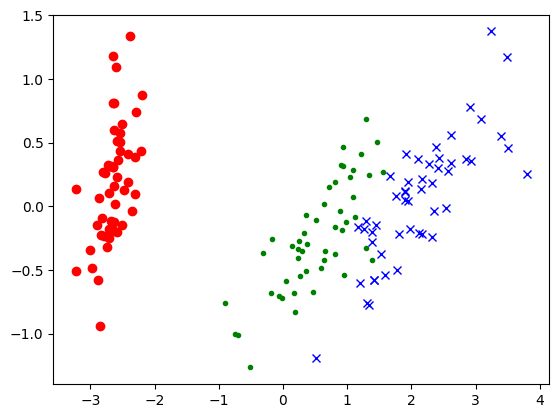

In [ ]:
%matplotlib inline
import numpy as np # 数値計算ライブラリ
import matplotlib.pyplot as plt # グラフ表示用
from sklearn.datasets import load_iris # Iris データ読み込み用
from sklearn.decomposition import PCA # 主成分分析の利用
from sklearn import preprocessing # データ前処理用
from sklearn.neighbors import KNeighborsClassifier # K 近傍法用
from sklearn.model_selection import cross_validate # 交差検証用
from sklearn.model_selection import cross_val_predict # 交差検証予測用
from sklearn.metrics import confusion_matrix # 混同行列用
iris=load_iris() # Iris データの読み込み
# print(iris.DESCR) # データ内容表示
X=iris.data # 特徴データの読み込み
y=iris.target # 教師データの読み込み
pca=PCA(n_components=2) # 主成分分析実行用変数（第 2 主成分まで）
X2=pca.fit_transform(X) # 第 1 主成分と第 2 主成分の軸へ写像
# データのプロット表示
plt.plot(X2[y==0,0],X2[y==0,1],"ro") # クラス 0 を赤●でプロット
plt.plot(X2[y==1,0],X2[y==1,1],"g.") # クラス 1 を緑・でプロット
plt.plot(X2[y==2,0],X2[y==2,1],"bx") # クラス 2 を青×でプロット
X_scaled=preprocessing.scale(X) # データの標準化
print(X_scaled.mean(axis=0)) # 標準化後の各特徴の平均値を表示
print(X_scaled.std(axis=0)) # 標準化後の各特徴の標準偏差を表示
clf=KNeighborsClassifier(n_neighbors=1) # K 近傍法実行用変数（近傍を 1 に設定）
print(clf) # 設定内容の表示（Anaconda では一部の設定のみ表示）
# 正解率、適合率、再現率、F 値による評価
scoring = ['accuracy','precision_macro','recall_macro','f1_macro'] # 評価
#項目指定
scores=cross_validate(clf,X,y,scoring=scoring,cv=10,return_train_score=False) # 10-fold 交差検証
print('accuracy: %0.2f'%scores['test_accuracy'].mean()) # 正解率（平均）
print('precision: %0.2f'%scores['test_precision_macro'].mean()) # 適合率
#（平均）
print('recall: %0.2f'%scores['test_recall_macro'].mean()) # 再現率（平均）
print('f1: %0.2f'%scores['test_f1_macro'].mean()) # F 値（平均）
# 混同行列確認
y_pred=cross_val_predict(clf,X_scaled,y,cv=10) # 予測を実行
print(confusion_matrix(y,y_pred)) # 混同行列で予測結果を表示